<a href="https://colab.research.google.com/github/Mcarre027/Mcarre027.github.io/blob/main/Cas_industriel_(fictif)_%E2%80%93_KPI%2C_arr%C3%AAts%2C_qualit%C3%A9%2C_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Période : 6 mois
dates = pd.date_range(start="2025-01-01", periods=180, freq="D")

data = []

for i, date in enumerate(dates):
    temps_planifie = 480  # 8h en minutes

    # Dérive progressive des arrêts
    if i < 60:
        temps_arret = np.random.normal(30, 5)
        cadence_reelle = np.random.normal(0.95, 0.02)
    elif i < 120:
        temps_arret = np.random.normal(45, 10)
        cadence_reelle = np.random.normal(0.88, 0.03)
    else:
        temps_arret = np.random.normal(70, 15)
        cadence_reelle = np.random.normal(0.80, 0.04)

    temps_arret = max(0, temps_arret)

    cadence_theorique = 1.2  # pièces/min
    cadence_reelle = max(0.5, cadence_reelle) * cadence_theorique

    production_totale = int((temps_planifie - temps_arret) * cadence_reelle)
    taux_qualite = np.random.normal(0.985, 0.01)
    production_conforme = int(production_totale * taux_qualite)

    cause = np.random.choice(
        ["Panne mécanique", "Réglage", "Manque opérateur", "Micro-arrêts"],
        p=[0.4, 0.25, 0.15, 0.2]
    )

    data.append([
        date,
        "Ligne A",
        temps_planifie,
        round(temps_arret, 1),
        production_totale,
        production_conforme,
        cadence_theorique,
        round(cadence_reelle, 2),
        cause
    ])

df = pd.DataFrame(
    data,
    columns=[
        "date", "ligne", "temps_planifie_min", "temps_arret_min",
        "production_totale", "production_conforme",
        "cadence_theorique", "cadence_reelle",
        "cause_principale_arret"
    ]
)

df.to_csv("trs_data_simulated.csv", index=False)
df.head()


,date,ligne,temps_planifie_min,temps_arret_min,production_totale,production_conforme,cadence_theorique,cadence_reelle,cause_principale_arret
0,2025-01-01,Ligne A,480,32.5,508,503,1.2,1.14,Panne mécanique
1,2025-01-02,Ligne A,480,37.6,507,504,1.2,1.15,Manque opérateur
2,2025-01-03,Ligne A,480,27.7,521,510,1.2,1.15,Panne mécanique
3,2025-01-04,Ligne A,480,27.7,487,484,1.2,1.08,Panne mécanique
4,2025-01-05,Ligne A,480,24.9,522,509,1.2,1.15,Réglage


**Disponibilité** = Temps planifieé − Temps d′arrêt / Temps planifieé




**Performance** = Cadence réelle / Cadence théorique



**Qualité** = Production conforme / Production totale


**TRS** = Disponibilté X Performance X Qualité







In [2]:
import pandas as pd

df = pd.read_csv("trs_data_simulated.csv", parse_dates=["date"])

# Disponibilité
df["disponibilite"] = (
    (df["temps_planifie_min"] - df["temps_arret_min"])
    / df["temps_planifie_min"]
)

# Performance
df["performance"] = df["cadence_reelle"] / df["cadence_theorique"]

# Qualité
df["qualite"] = df["production_conforme"] / df["production_totale"]

# TRS
df["trs"] = df["disponibilite"] * df["performance"] * df["qualite"]

df[["date", "disponibilite", "performance", "qualite", "trs"]].head()


,date,disponibilite,performance,qualite,trs
0,2025-01-01,0.932292,0.950000,0.990157,0.876960
1,2025-01-02,0.921667,0.958333,0.994083,0.878037
2,2025-01-03,0.942292,0.958333,0.978887,0.883964
3,2025-01-04,0.942292,0.900000,0.993840,0.842838
4,2025-01-05,0.948125,0.958333,0.975096,0.885991


In [3]:
df.describe()[["disponibilite", "performance", "qualite", "trs"]]


,disponibilite,performance,qualite,trs
count,180.000000,180.000000,180.000000,180.000000
mean,0.901059,0.875741,0.985290,0.779616
min,0.783125,0.700000,0.956410,0.572061
25%,0.871875,0.814583,0.978891,0.702765
50%,0.912292,0.883333,0.986205,0.790061
75%,0.934010,0.935417,0.992222,0.866360
max,0.973750,1.008333,1.015345,0.939314
std,0.041187,0.071417,0.010255,0.092330


On observe une baisse progressive du TRS sur la période étudiée.
La qualité reste globalement stable, ce qui est cohérent avec un environnement pharmaceutique.
La dégradation semble principalement portée par la disponibilité et la performance, suggérant des problématiques d’arrêts et de cadence.

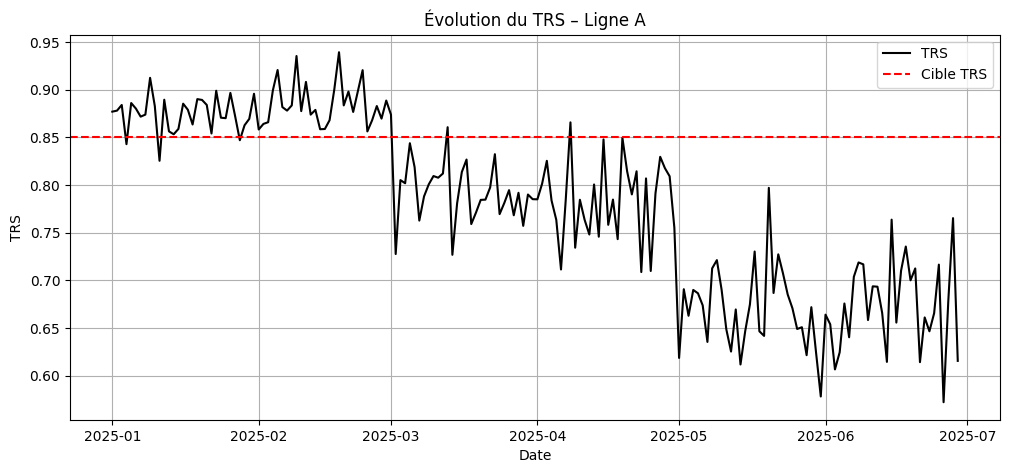

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df["date"], df["trs"], label="TRS", color="black")
plt.axhline(0.85, linestyle="--", color="red", label="Cible TRS")
plt.title("Évolution du TRS – Ligne A")
plt.ylabel("TRS")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()


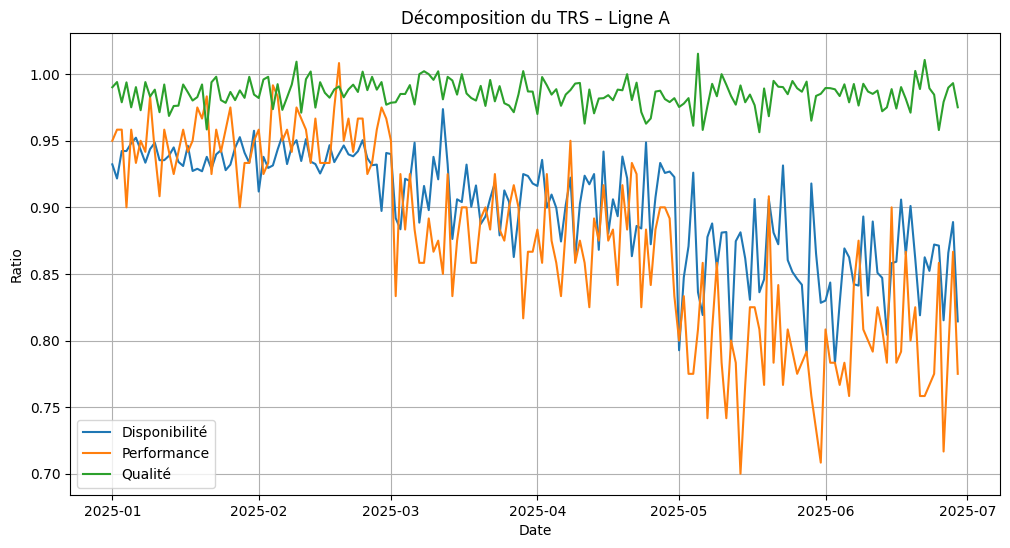

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["disponibilite"], label="Disponibilité")
plt.plot(df["date"], df["performance"], label="Performance")
plt.plot(df["date"], df["qualite"], label="Qualité")

plt.title("Décomposition du TRS – Ligne A")
plt.ylabel("Ratio")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()


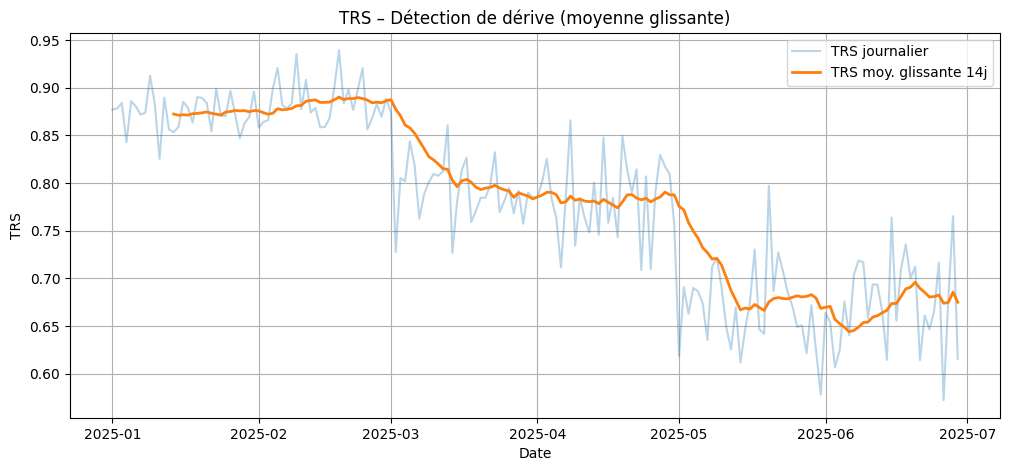

In [6]:
df["trs_rolling_14j"] = df["trs"].rolling(window=14).mean()

plt.figure(figsize=(12,5))
plt.plot(df["date"], df["trs"], alpha=0.3, label="TRS journalier")
plt.plot(df["date"], df["trs_rolling_14j"], linewidth=2, label="TRS moy. glissante 14j")

plt.title("TRS – Détection de dérive (moyenne glissante)")
plt.ylabel("TRS")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()


L’analyse temporelle met en évidence une dérive progressive du TRS sur la période étudiée.
La qualité reste stable, excluant un problème produit.
La performance montre une baisse graduelle, agissant comme signal faible, tandis que la disponibilité présente une dégradation plus marquée en fin de période.
Cette combinaison suggère un vieillissement de l’équipement ou une organisation moins robuste face aux aléas.

In [7]:
trs_mean = df["trs"].mean()
trs_std = df["trs"].std()

seuil_alerte = trs_mean - 2 * trs_std
seuil_alerte


np.float64(0.5949564937219438)

In [8]:
df["alerte_trs"] = df["trs"] < seuil_alerte

df[df["alerte_trs"]].head()


,date,ligne,temps_planifie_min,temps_arret_min,production_totale,production_conforme,cadence_theorique,cadence_reelle,cause_principale_arret,disponibilite,performance,qualite,trs,trs_rolling_14j,alerte_trs
150,2025-05-31,Ligne A,480,82.4,339,334,1.2,0.85,Panne mécanique,0.828333,0.708333,0.985251,0.578082,0.668358,True
176,2025-06-26,Ligne A,480,88.7,336,329,1.2,0.86,Micro-arrêts,0.815208,0.716667,0.979167,0.572061,0.673778,True


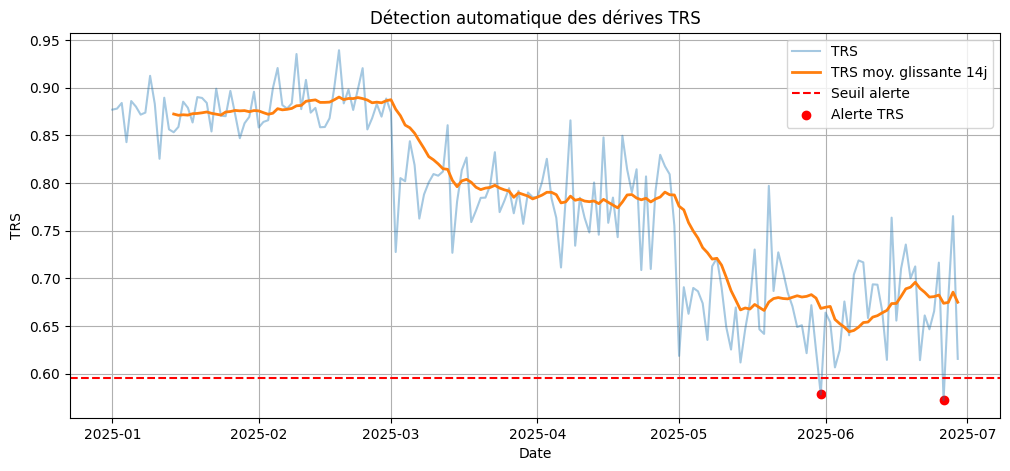

In [9]:
plt.figure(figsize=(12,5))

plt.plot(df["date"], df["trs"], label="TRS", alpha=0.4)
plt.plot(df["date"], df["trs_rolling_14j"], label="TRS moy. glissante 14j", linewidth=2)

plt.axhline(seuil_alerte, color="red", linestyle="--", label="Seuil alerte")

alertes = df[df["alerte_trs"]]
plt.scatter(alertes["date"], alertes["trs"], color="red", label="Alerte TRS")

plt.title("Détection automatique des dérives TRS")
plt.ylabel("TRS")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
df[df["alerte_trs"]]["cause_principale_arret"].value_counts()


,count
cause_principale_arret,
Panne mécanique,1
Micro-arrêts,1


Les périodes de TRS en alerte sont majoritairement associées à des pannes mécaniques et des phases de réglage prolongées.

La mise en place d’un seuil dynamique permet d’identifier automatiquement les périodes de dérive de performance.
Cette approche met en évidence une augmentation des alertes TRS en fin de période, corrélée principalement à des problématiques de disponibilité et de performance.
Un tel mécanisme pourrait être utilisé comme système d’alerte précoce afin de déclencher des analyses de causes racines ou des actions de maintenance ciblées.

Recommandations

Mettre en place un suivi hebdomadaire de la performance (cadence réelle vs théorique)

Prioriser l’analyse des pannes mécaniques et des temps de réglage lors des périodes en alerte

Déployer un système d’alerte automatique basé sur le TRS moyen glissant

Associer les alertes à une analyse de causes racines standardisée (QRQC, A3)

Limites

Données simulées (absence de capteurs temps réel)

Granularité journalière (pas intra-journalière)

Causes d’arrêt non détaillées (pas de sous-causes)

Améliorations possibles

Intégration temps réel via MES / IoT

Détection multivariée (TRS + énergie + maintenance)

Automatisation des alertes (mail / Teams)

Intégration dans un cadre de gouvernance des données industrielles